In [2]:
# Importation des biblithèques nécessaires pour le modèle
import numpy as np
import pandas as pd
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import operator
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# importation et prétraitement des données
xlsx = pd.ExcelFile('datatest_F20_8P.xlsx')
df1 = pd.read_excel(xlsx, 's1')
df2 = pd.read_excel(xlsx, 's2')
df3 = pd.read_excel(xlsx, 's3')
df4 = pd.read_excel(xlsx, 's4')
df5 = pd.read_excel(xlsx, 's5')
df6 = pd.read_excel(xlsx, 's6')
df7 = pd.read_excel(xlsx, 's7')
df8 = pd.read_excel(xlsx, 's8')
df9 = pd.read_excel(xlsx, 's9')
df10 = pd.read_excel(xlsx, 's10')

df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10])

def trier_df(df, colonne):
  df.sort_values(by=colonne, inplace=True)
  return df
df_trie = trier_df(df, 'sortie')

X=pd.DataFrame(np.c_[df_trie['tibia_X'],df_trie['tibia_Y'],df_trie['tibia_Z'],df_trie['lumbar_X'],df_trie['lumbar_Y'],df_trie['lumbar_Z']])
Y_train = df_trie['sortie']

scaler = StandardScaler()
X_train = scaler.fit_transform(X)
X_train.shape, Y_train.shape

((400000, 6), (400000,))

# Impact de C sur le modèle

In [4]:
# Fonction de création du modèle SVM
def models_generation(C,df,df_test):
    model = SVR(kernel='rbf',C=C)
    df_trie = trier_df(df, 'sortie')
    X=pd.DataFrame(np.c_[df_trie['tibia_X'],df_trie['tibia_Y'],df_trie['tibia_Z'],df_trie['lumbar_X'],df_trie['lumbar_Y'],df_trie['lumbar_Z']])
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X)
    Y_train = df_trie['sortie']
    model.fit(X_train, Y_train)
    
    X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
    Y_test = df_test['sortie']

    X_test = scaler.fit_transform(X2)

    return C, model.score(X_test, Y_test, sample_weight=None)

processing: 1
0.9856181162944464
processing: 2
0.9903277611692958
processing: 3
0.9922267147553079
processing: 4
0.9932156500623716
processing: 5
0.9937979861235586
processing: 6
0.9942168057358594
processing: 7
0.9945626411183576
processing: 8
0.9948806303781601
processing: 9
0.9951484733751375
processing: 10
0.9953829031743104
processing: 11
0.9955907120030532
processing: 12
0.9957747612764773
processing: 13
0.9959314139979277
processing: 14
0.9960711994051696
processing: 15
0.9961974041099044
processing: 16
0.99630932250446
processing: 17
0.9964152988562005
processing: 18
0.9965134013813454
processing: 19
0.9966034512060608
processing: 20
0.996688209967815
processing: 21
0.99676543015695
processing: 22
0.9968372857796017
processing: 23
0.9969019030738452
processing: 24
0.9969605387483658
processing: 25
0.9970149075819172
processing: 26
0.9970634201263393
processing: 27
0.997109382439583
processing: 28
0.9971515456803458
processing: 29
0.9971901221918108
processing: 30
0.997226358307

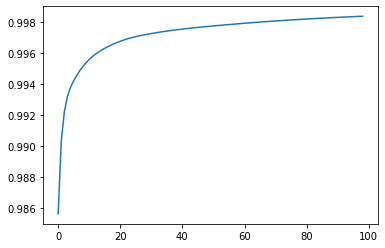

In [5]:
# Analyse des paramètres, pour déterminer le meilleur paramètre
df_test = pd.read_excel("datatest_F20_8P.xlsx")
c_ls=[]
score_ls=[]
for i in range(1,100):
    print('processing:',i)
    score = models_generation(i, df1,df_test)
    score_ls.append(score[1])
    print(score[1])
    c_ls.append(i)

plt.plot(score_ls)

In [6]:

print(max(score_ls))


0.9983797342080126


· END

In [7]:
# Entrainement du modèle SVM
model = SVR(kernel='rbf',C=100)

model.fit(X_train, Y_train)

SVR(C=100)

rmse =  160.5884858282137
r2 =  0.9020990788354097


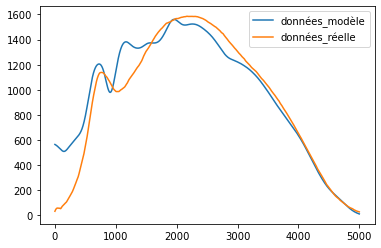

In [8]:
# Test du modèle et affichage de la courbe prédite
df_test = pd.read_excel("datatest_F20_S0_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  160.5884858282137
r2 =  0.9020990788354097


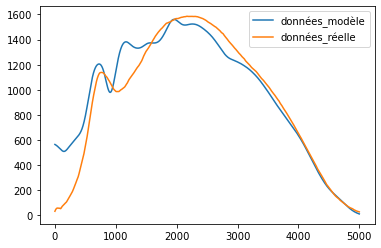

In [9]:
# Test du modèle et affichage de la courbe prédite
df_test = pd.read_excel("datatest_F20_S1_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  144.95629001373624
r2 =  0.918909825472932


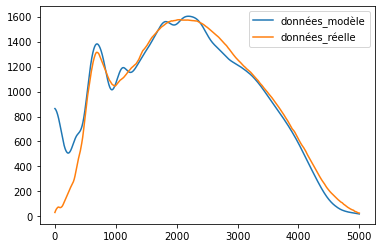

In [10]:
df_test = pd.read_excel("datatest_F20_S2_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  59.85715515618273
r2 =  0.9851562167402266


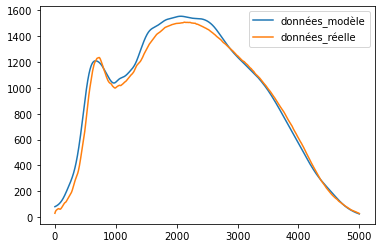

In [11]:
df_test = pd.read_excel("datatest_F20_S3_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  152.81275745130236
r2 =  0.9052039436800805


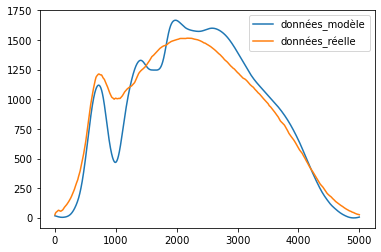

In [12]:
df_test = pd.read_excel("datatest_F20_S4_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  75.02985381811067
r2 =  0.9779320578109062


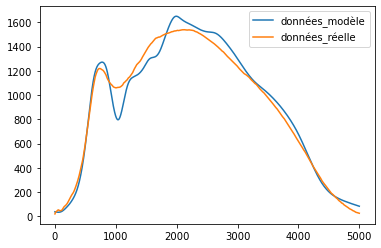

In [13]:
df_test = pd.read_excel("datatest_F20_S5_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  69.48454868302906
r2 =  0.9815004080820301


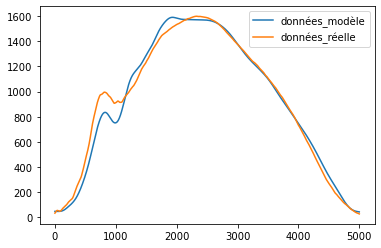

In [14]:
df_test = pd.read_excel("datatest_F20_S6_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  71.90888442887709
r2 =  0.982135535383183


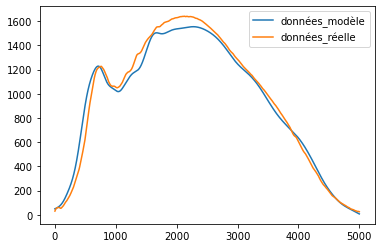

In [15]:
df_test = pd.read_excel("datatest_F20_S7_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  62.67333106127908
r2 =  0.9847344834627774


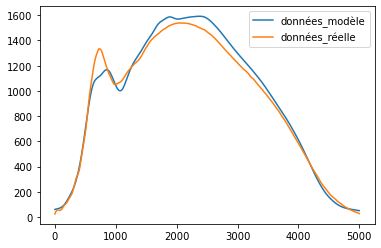

In [16]:
df_test = pd.read_excel("datatest_F20_S8_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  35.257615937626625
r2 =  0.995493509808203


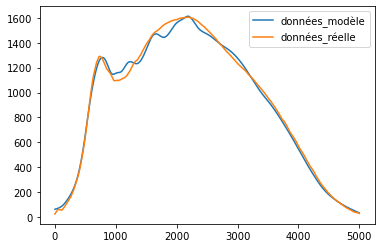

In [17]:
df_test = pd.read_excel("datatest_F20_S9_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)

rmse =  63.48518304003747
r2 =  0.9842111653086243


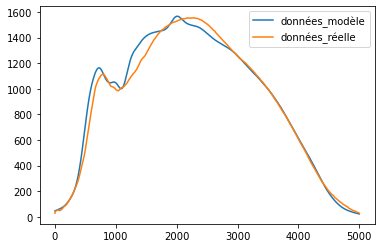

In [18]:
df_test = pd.read_excel("datatest_F20_S10_P10.xlsx")
X2 = pd.DataFrame(np.c_[df_test['tibia_X'],df_test['tibia_Y'],df_test['tibia_Z'],df_test['lumbar_X'],df_test['lumbar_Y'],df_test['lumbar_Z']])
Y_test = df_test['sortie']

X_test = scaler.fit_transform(X2)
Y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,Y_pred))
r2 = r2_score(Y_test,Y_pred)
print("rmse = ",rmse)
print("r2 = ",r2)

plt.plot(Y_pred)
plt.plot(Y_test)
plt.legend(["données_modèle", "données_réelle"], loc=1)